In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as py
import plotly.express as px


## Load and inspect the data 

In [2]:
os.chdir(r'C:\Users\User\OneDrive\Desktop\jupyter notbook for python')


In [3]:
car_sales = pd.read_csv('Car_sales_data.csv', encoding='ISO-8859-1')

In [4]:
# what are the 5 first rows of the dataset
car_sales.head(5)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÃÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÃÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÃÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [5]:
#showing the shape of the car sales data
car_sales.shape

(23906, 16)

In [6]:
# displaying the summary and data types of  car sales data
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [7]:
# what are the columns names of the dataset
car_sales.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

## Exploratory data analysis


In [8]:
# let check for missing values first
car_sales.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [9]:
# we have only one missing value in the customer name field. The the analysis this may not be a big deal, so we don't need to drop it

In [10]:
# checking for duplicated values
car_sales.duplicated().sum()

np.int64(0)

In [11]:
# let check for basic statistics for numerical values

car_sales[['Annual Income','Price ($)']].describe()

,Annual Income,Price ($)
count,2.390600e+04,23906.000000
mean,8.308403e+05,28090.247846
std,7.200064e+05,14788.687608
min,1.008000e+04,1200.000000
25%,3.860000e+05,18001.000000
50%,7.350000e+05,23000.000000
75%,1.175750e+06,34000.000000
max,1.120000e+07,85800.000000



The average annaual income is 830.840 and the Standard Deviation of 720.006. This may indicate that the annual Income values have many extreme values. we will be checking for outlier during the analysis.
The lowest annual Income is 10.080 which is the lower end of the income
The average price is 28.090 and the standard deviation of $14.788 for the price could indicate a moderate variability. 

 

In [12]:
#let's drop some columns that aren't relevant for the analysis.
columns_to_drop= ['Car_id','Customer Name','Dealer_No ','Phone','Dealer_Name']
car_data= car_sales.drop(columns_to_drop, axis =1)
car_data.head(5)

,Date,Gender,Annual Income,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Male,13500,Ford,Expedition,DoubleÃÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,Dodge,Durango,DoubleÃÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Acura,TL,DoubleÃÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [13]:
car_data.shape

(23906, 11)

In [14]:
car_data.head(5)

,Date,Gender,Annual Income,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Male,13500,Ford,Expedition,DoubleÃÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,Dodge,Durango,DoubleÃÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Acura,TL,DoubleÃÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


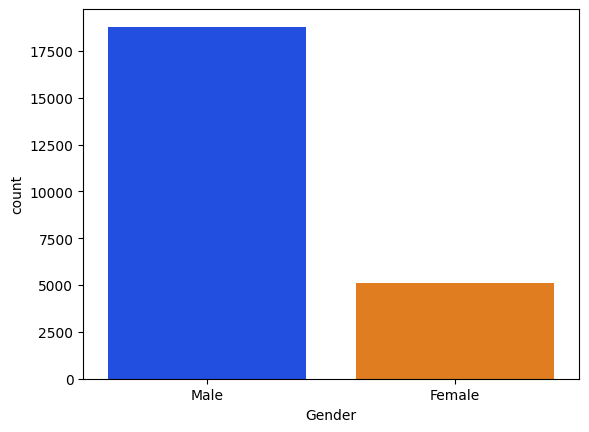

In [15]:
# Gender representation in the dataset
sns.countplot(x = 'Gender', data =car_data,palette =  'bright', hue = 'Gender' );


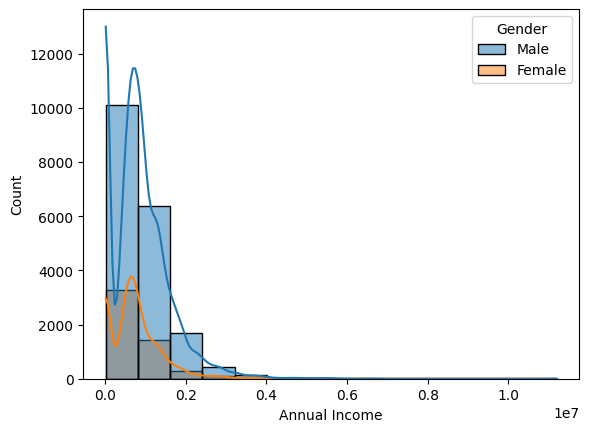

In [16]:
# income distribution  per gender
sns.histplot(data = car_data, x = 'Annual Income',hue = 'Gender' , kde=True, bins =14);


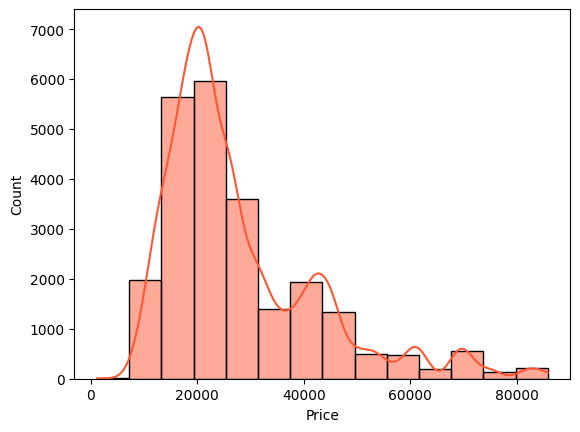

In [17]:
# What is the distribution of price
car_data.rename(columns = {'Price ($)':'Price'}, inplace = True)
sns.histplot(data= car_data, x = 'Price', bins = 14 , color ='#FF5733',kde= True);


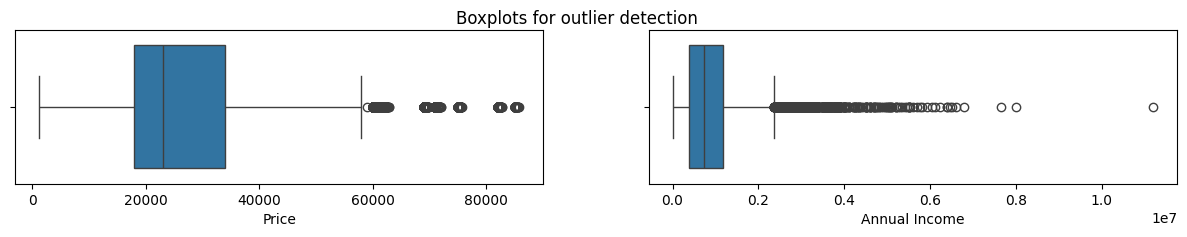

In [18]:
 # Are there outlier in the Income and price columns
fig, axes = plt.subplots(1, 2, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=car_data['Price'])
sns.boxplot(ax=axes[1], x=car_data['Annual Income'])
plt.show()



 The box plot reveals a  noticeable outliers for both price and annual income. This observation aligns with the findings from the statistical summary, which also indicated the presence of these anomalies.

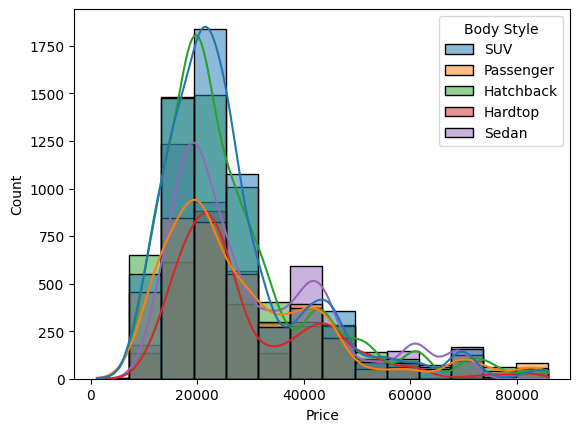

In [19]:
# The below visulization can help to understand how prices vary accross different body styles.
sns.histplot(data= car_data, x = 'Price',bins = 14, hue = 'Body Style', color ='dark',kde =True);


In [20]:
# let's convert the date columns to a datetime format and extract the year and and month for the each sales
car_data['Date'] = pd.to_datetime(car_data['Date'])
car_data['year'] = car_data['Date'].dt.year
car_data['month'] = car_data['Date'].dt.month_name().str[:3]
car_data.head(5)



,Date,Gender,Annual Income,Company,Model,Engine,Transmission,Color,Price,Body Style,Dealer_Region,year,month
0,2022-01-02,Male,13500,Ford,Expedition,DoubleÃÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown,2022,Jan
1,2022-01-02,Male,1480000,Dodge,Durango,DoubleÃÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora,2022,Jan
2,2022-01-02,Male,1035000,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville,2022,Jan
3,2022-01-02,Male,13500,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco,2022,Jan
4,2022-01-02,Male,1465000,Acura,TL,DoubleÃÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville,2022,Jan


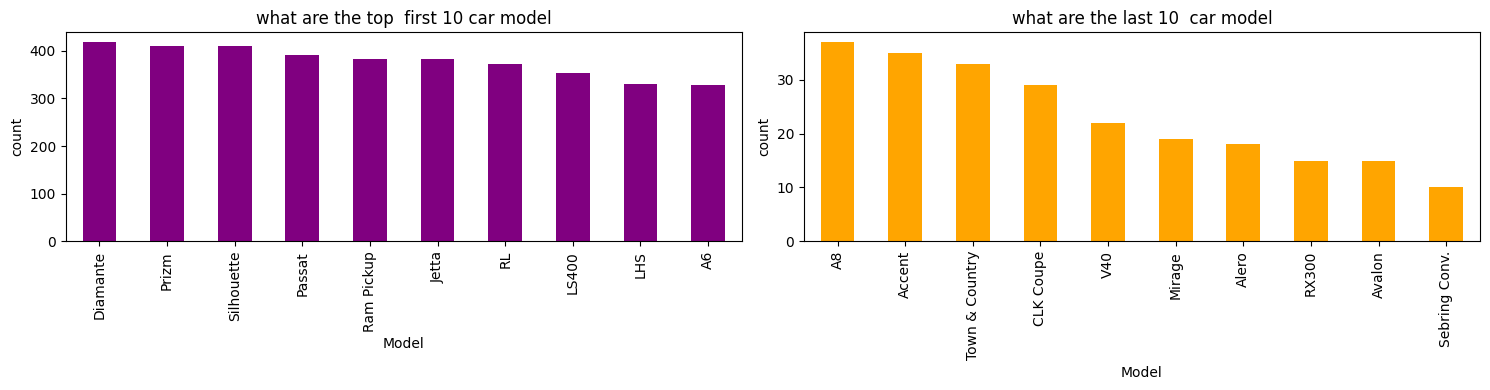

In [21]:
# let's visualized the top 10 and the last 10 car models sold in the years 2022 and 2023 
fig,axes = plt.subplots(1,2,figsize = (15,4))

# top 10 models
car_data['Model'].value_counts()[:10].plot(kind = 'bar', color = 'purple', ax = axes[0])
axes[0].set_title('what are the top  first 10 car model')
axes[0].set_ylabel('count')

#last 10 models
car_data['Model'].value_counts().tail(10).plot(kind = 'bar', color = 'orange', ax=axes[1])
axes[1].set_title('what are the last 10  car model')
axes[1].set_ylabel('count')
plt.tight_layout()
plt.show()


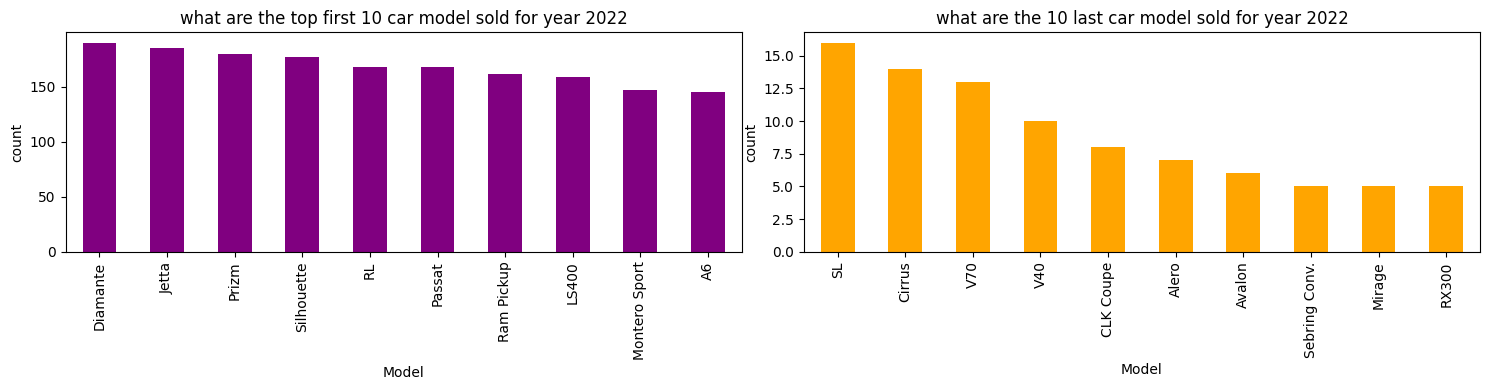

In [22]:
# ploting the top 10 and the last 10 car models sold for year 2022
fig,axes = plt.subplots(1,2,figsize = (15,4))

#2022 top 10 models
car_data[car_data['year']==2022]['Model'].value_counts()[:10].plot(kind = 'bar',color = 'purple',ax = axes[0])
axes[0].set_title('what are the top first 10 car model sold for year 2022')
axes[0].set_ylabel('count')
plt.xticks(rotation = 90 )


#2022 last 10  models
car_data[car_data['year']==2022]['Model'].value_counts().tail(10).plot(kind = 'bar', color = 'orange', ax = axes[1])
axes[1].set_title('what are the 10 last car model sold for year 2022')
axes[1].set_ylabel('count')

plt.tight_layout()
plt.show()


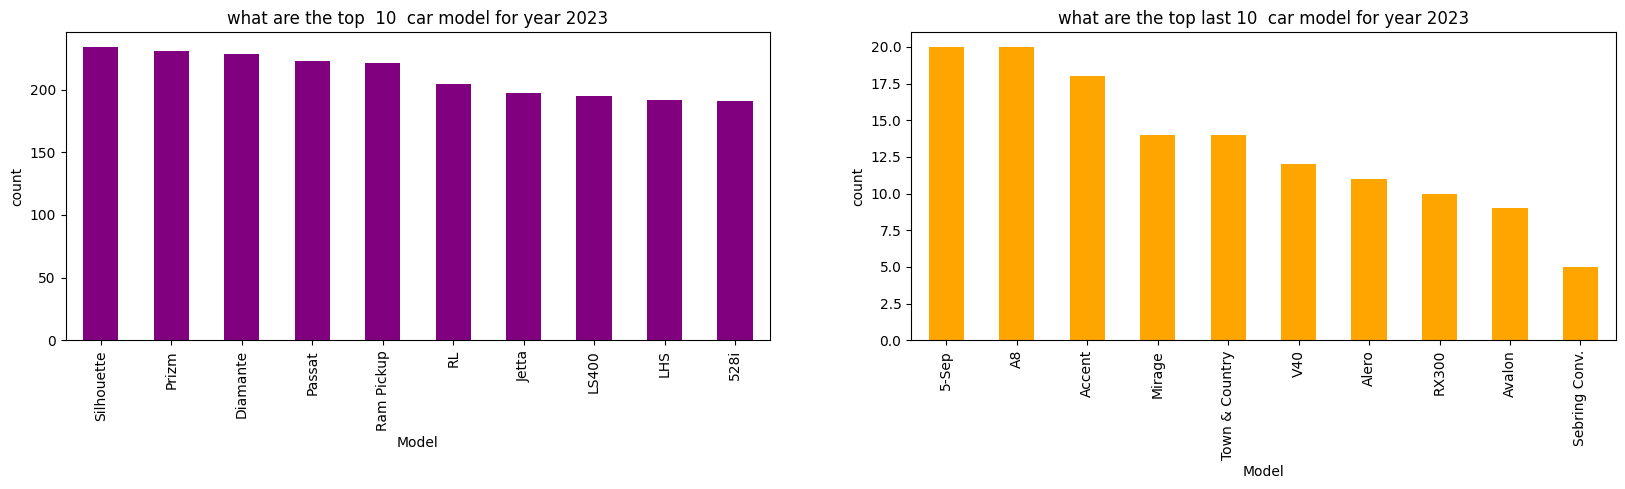

In [23]:
# ploting the top 10  and last 10 car models sold for 2023
fig,axes = plt.subplots(1,2, figsize = (20,4))
#2023 top 10 models
car_data[car_data['year']==2023]['Model'].value_counts()[:10].plot(kind = 'bar', color = 'purple', ax=axes[0])
axes[0].set_title('what are the top  10  car model for year 2023')
axes[0].set_ylabel('count')

#2023 last 10 models mosdels 
car_data[car_data['year']==2023]['Model'].value_counts().tail(10).plot(kind = 'bar', color = 'orange', ax=axes[1])
axes[1].set_title('what are the top last 10  car model for year 2023')
axes[1].set_ylabel('count')
plt.xticks(rotation = 90)

plt.show()

In [24]:
# simply breackdown this whith numbers. 
print('what are excat values to compare 2022 and 2023 top 10 cars model')
print(car_data[car_data['year']== 2022]['Model'].value_counts()[:10])
print('')
print(car_data[car_data['year']==2023]['Model'].value_counts()[:10])
print('')
print( 'what are excat values to compare 2022 and 2023 last 10 cars models')
print(car_data[car_data['year']== 2022]['Model'].value_counts().tail(10))
print('')
print(car_data[car_data['year']==2023]['Model'].value_counts().tail(10))

what are excat values to compare 2022 and 2023 top 10 cars model
Model
Diamante         190
Jetta            185
Prizm            180
Silhouette       177
RL               168
Passat           168
Ram Pickup       162
LS400            159
Montero Sport    147
A6               145
Name: count, dtype: int64

Model
Silhouette    234
Prizm         231
Diamante      228
Passat        223
Ram Pickup    221
RL            204
Jetta         197
LS400         195
LHS           192
528i          191
Name: count, dtype: int64

what are excat values to compare 2022 and 2023 last 10 cars models
Model
SL               16
Cirrus           14
V70              13
V40              10
CLK Coupe         8
Alero             7
Avalon            6
Sebring Conv.     5
Mirage            5
RX300             5
Name: count, dtype: int64

Model
5-Sep             20
A8                20
Accent            18
Mirage            14
Town & Country    14
V40               12
Alero             11
RX300             10
Avalo

### Insight from the top 10 models sold in 2022 and 2023
We can conclude that several models appear in the top 10 list for both years, such as the Diamante, Jetta, Prizm Silhouette, RL Passat, Ram Pickup, and LS400. The silhouette, Prizm, and Diamante have shown significant increases in sales from 2022 to 2023, which means they have grown in popularity. We also noticed that the LHS and 528i models entered the top 10 list in 2023, replacing the Montero Sport and A6 from 2022
### insight from the last 10 models sold in 2020 and 2023
     
The Mirage, V40, Alero, RX300, Avalon, and Sebring Convertible consistently appear in the last 10 models list for both 2022 and 2023. However, models such as the SL, Cirrus, V70, and CLK Coupe were among the last 10 in 2022 but are absent from the 2023 list. This change could suggest either an improvement in their sales or a discontinuation of these models in 2023. Conversely, the 5-Sep, A8, Accent, and Town & Country have entered the last 10 list in 2023, indicating that these models did not resonate well with consumers, leading to lower sales.

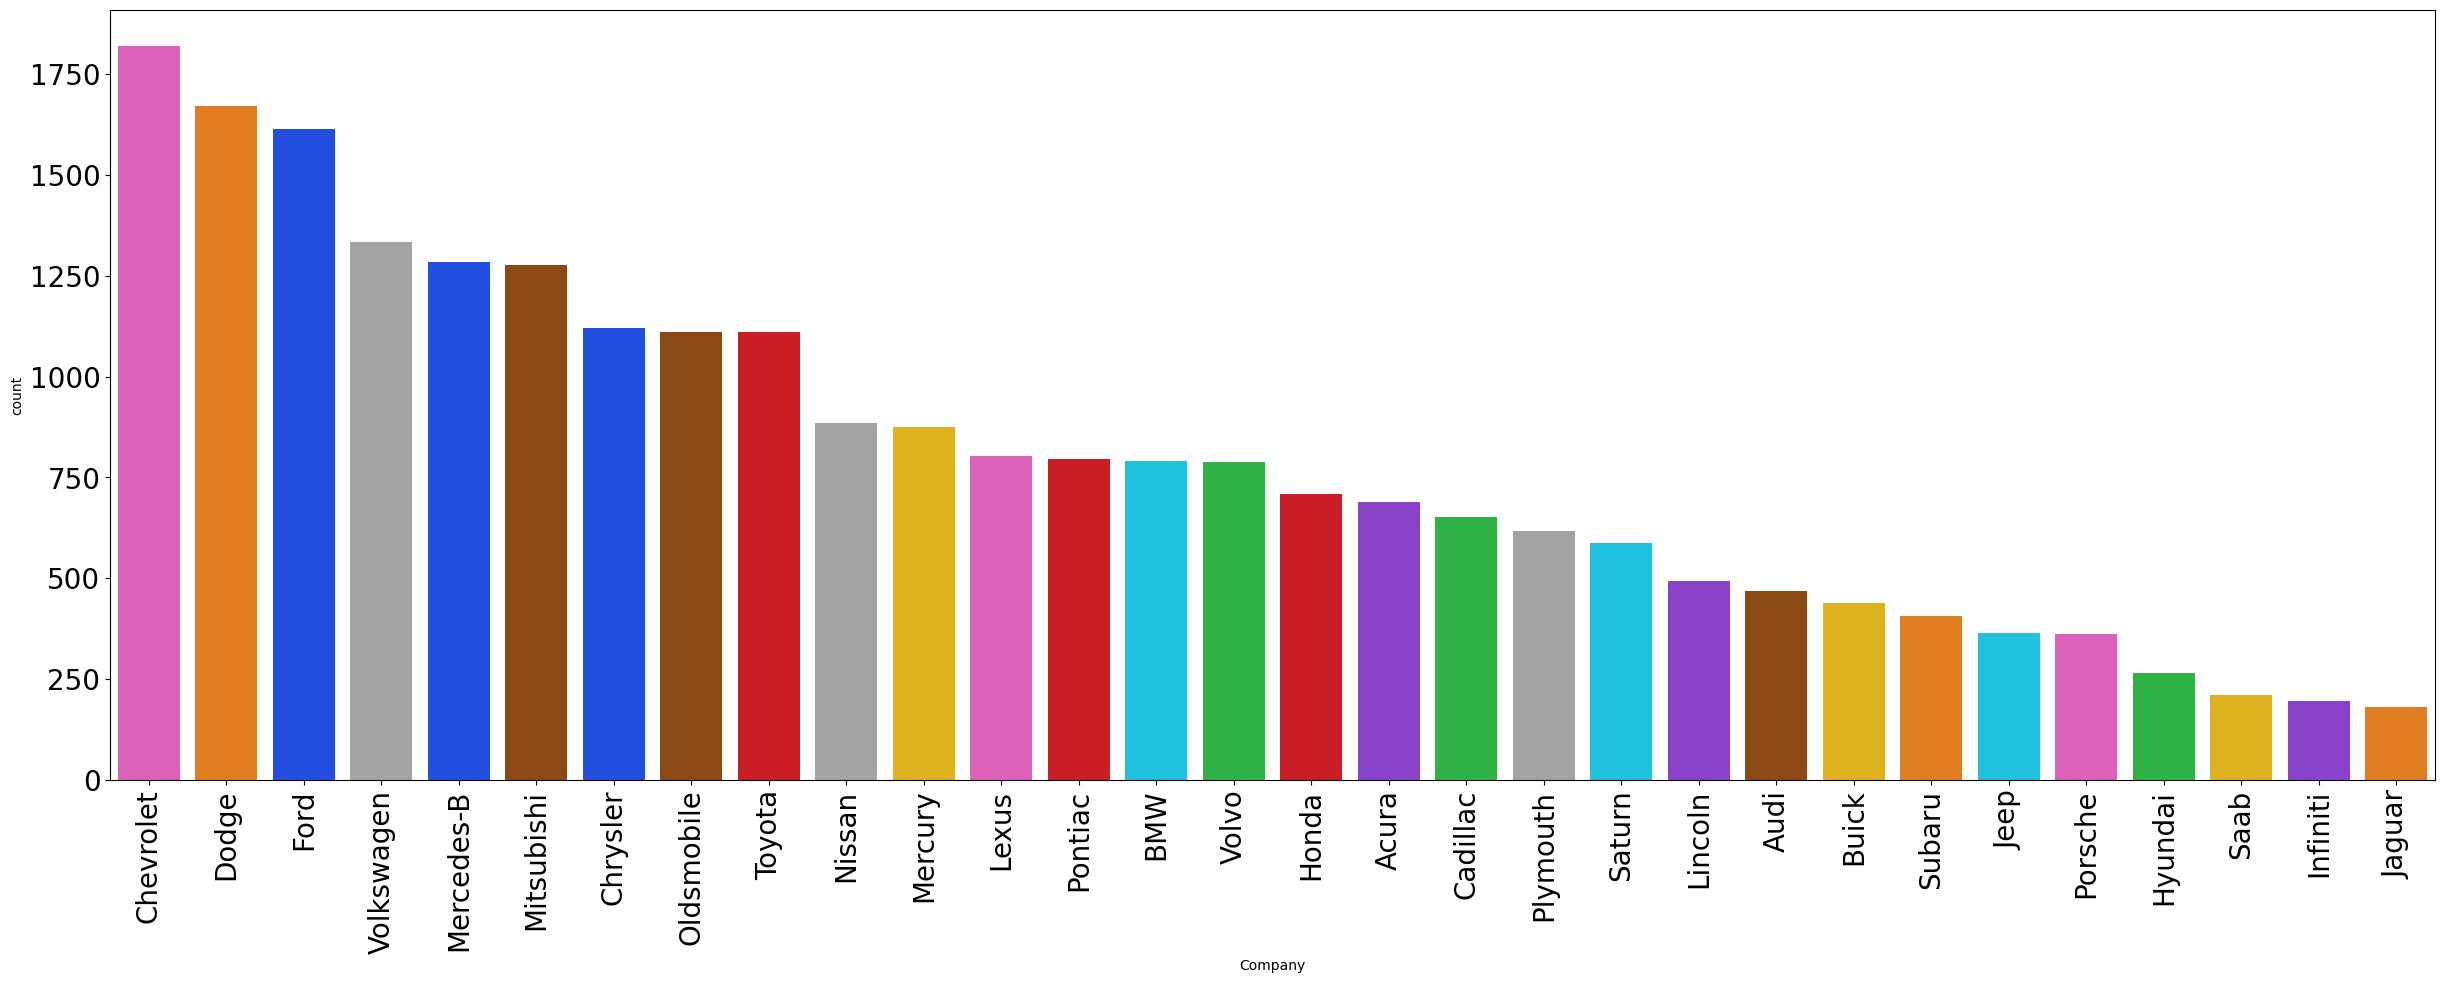

In [25]:
# who are the top manufacturers involved the the car sales for 2022 and 2023
plt.figure(figsize = (30,10))
company_counts = car_data['Company'].value_counts(). sort_values(ascending = False)
sns.countplot(data = car_data, x = 'Company', hue = 'Company' , palette = 'bright', order=company_counts.index)
plt.xticks(rotation = 90 , fontsize =20)
plt.yticks(fontsize = 20);


The top manufacturers involved in car sales for 2022 and 2023 include prominent brands such as Chevrolet, Dodge,  and Ford. Additionally, Vollkswagen, Mercedes-B and Mitsubishi played a crucial roles in the market. This mix of manufaturers highlights the competitive landscape and varying consumer preferences across different segments of the automotive industry.

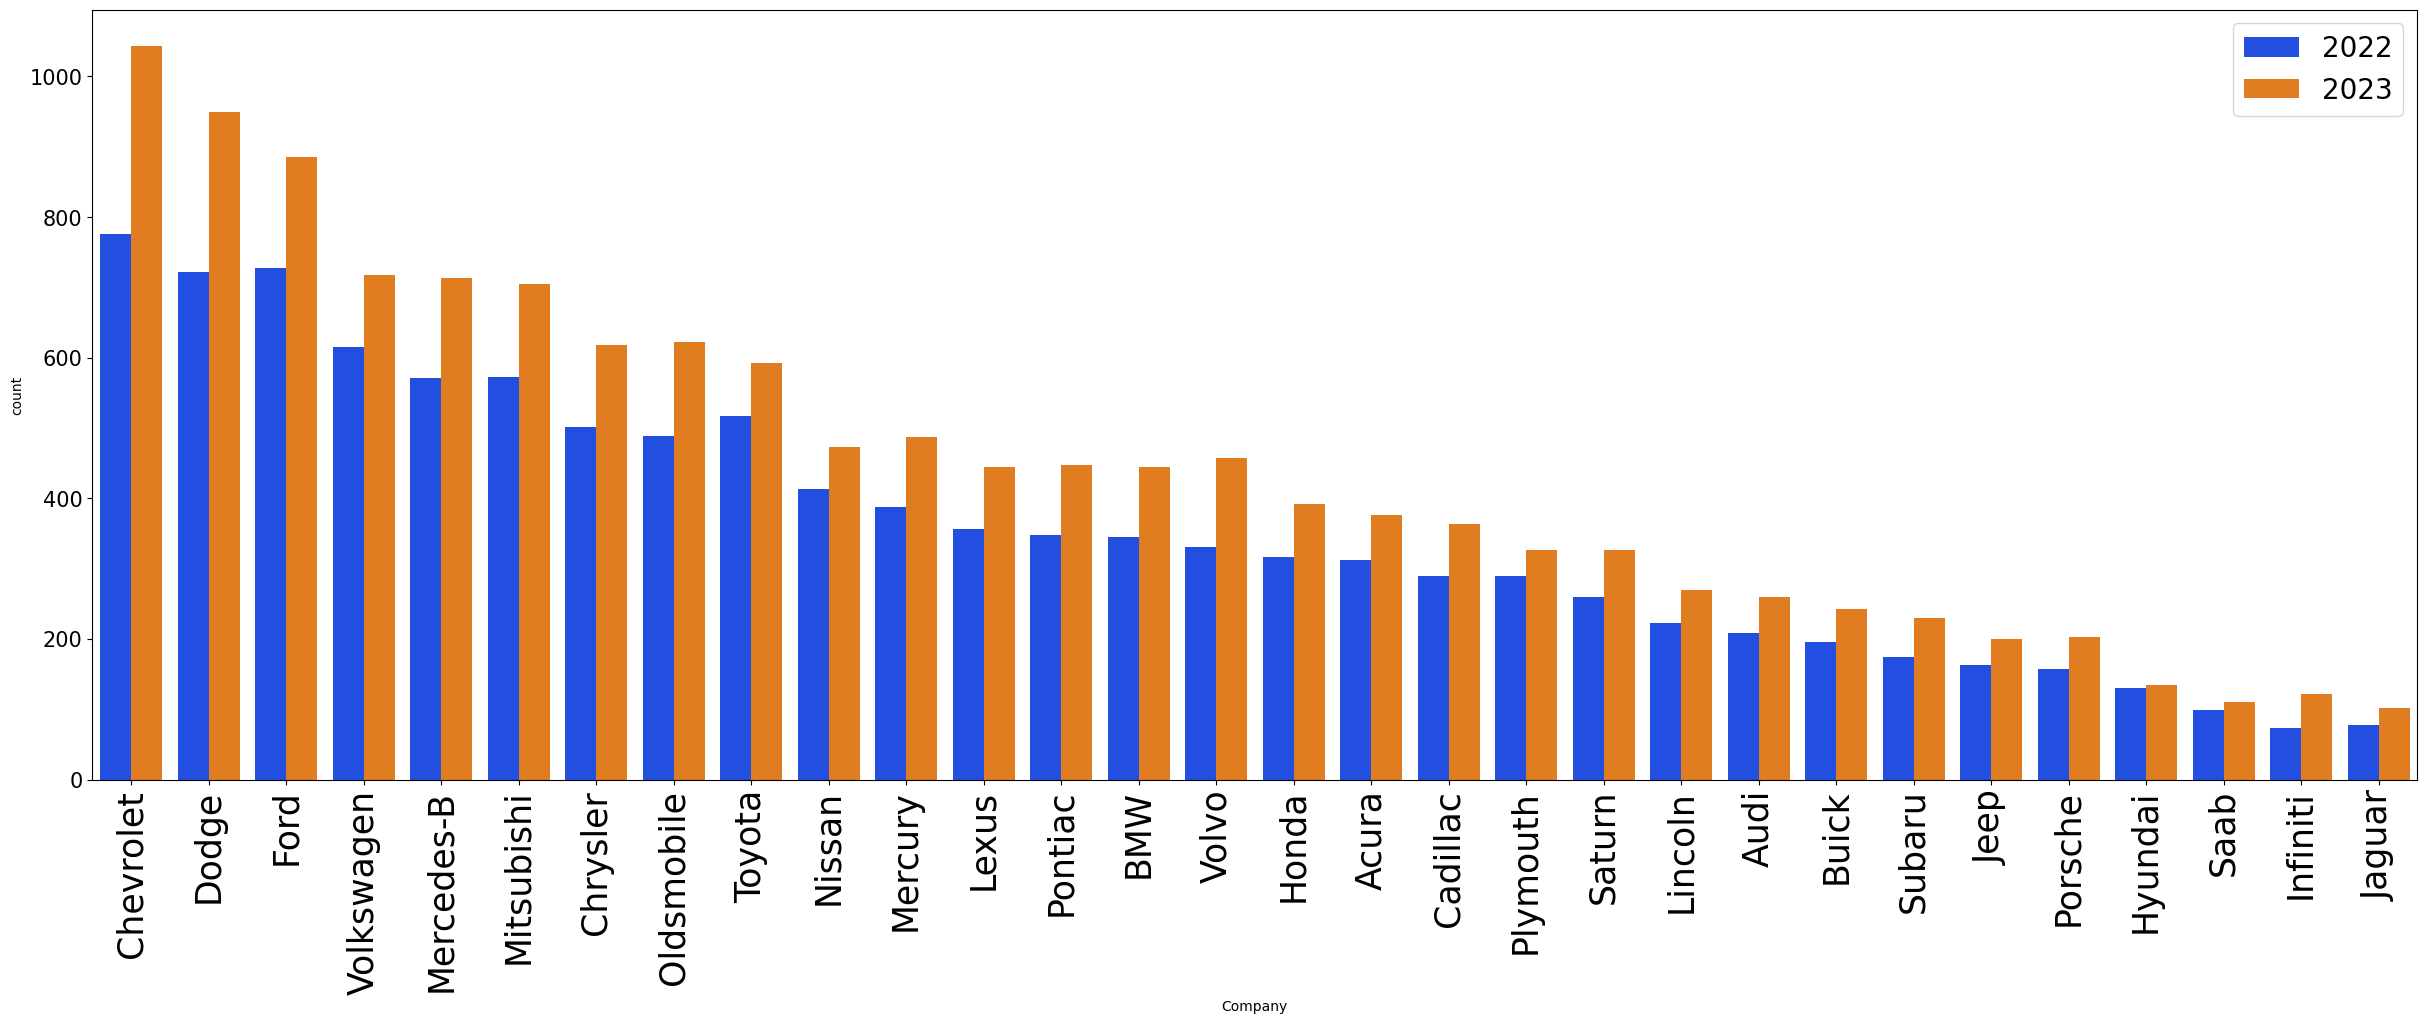

In [26]:
# let's examin sales for 2022 and 2023 for each manufacturer.
plt.figure(figsize = (30,10))
company_counts = car_data['Company'].value_counts(). sort_values(ascending = False)
sns.countplot(data = car_data, x = 'Company',hue= 'year' , palette = 'bright', order = company_counts.index)
plt.xticks(rotation = 90 , fontsize =25)
plt.yticks(fontsize = 15)
plt.legend(fontsize =20);


Each manufacturer has experienced a slight increase in sales from 2022 to 2023.This could be associated  to several factors such as improved economic and marketing campaigns, and introduction of new models that increased consumer satisfaction. 

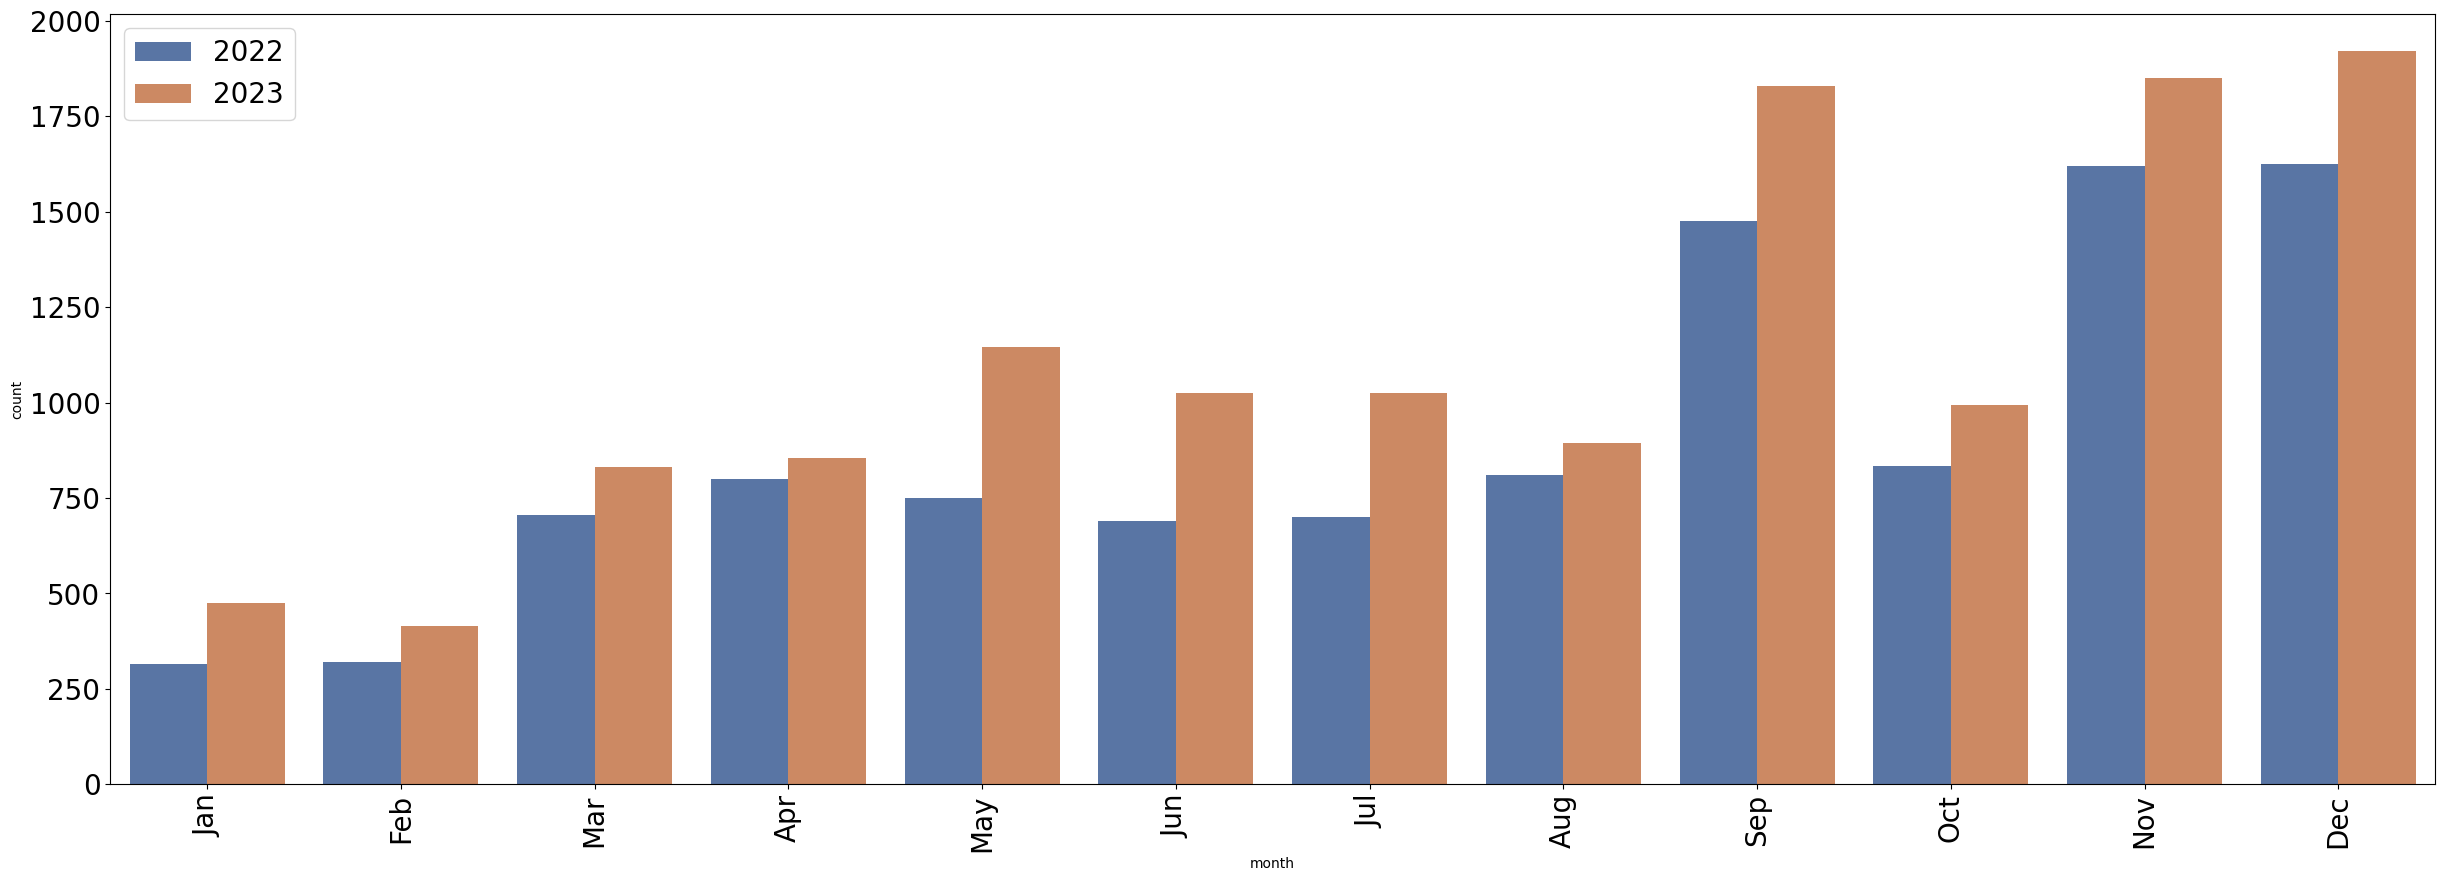

In [27]:

#let's visulaize the car sales for each month across years
plt.figure(figsize = (30,10))
sns.countplot(data = car_data, x = 'month', hue= 'year' , palette = 'deep')
plt.xticks(rotation = 90 , fontsize =20)
plt.yticks ( fontsize =20)

plt.legend(fontsize =20);

This analysis shows car sales exhibit distinct seasonal patterns. Specifically, we can notice spike in sales during September, followed by a dip in October, and then another increase in November and December. This insight suggests that there is variation on consumer behavior and market strategy throughout the year. We also observed that sales in January and Febuary are low

<Axes: xlabel='Color', ylabel='count'>

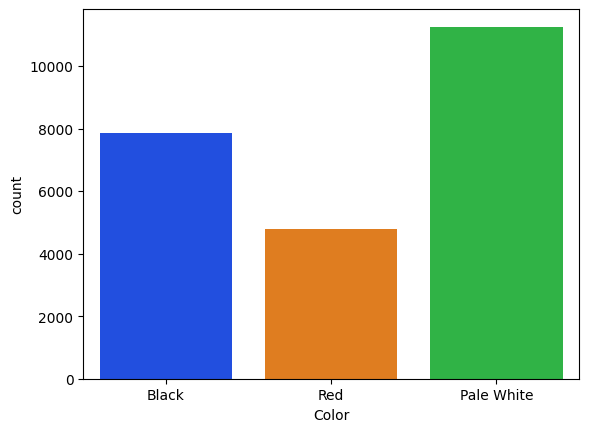

In [28]:
# Let's check for color preference 

sns.countplot(data= car_data, x='Color', hue = 'Color' , palette = 'bright' )

<Axes: xlabel='Body Style', ylabel='count'>

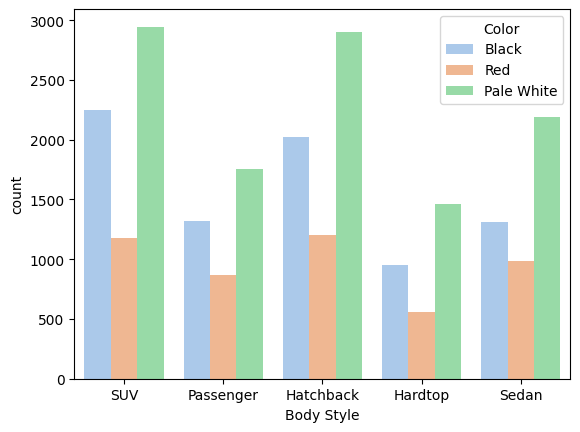

In [29]:
# Is there any trend between the body style and color for the car sold in 2022 and 2023
sns.countplot(data= car_data, x='Body Style', hue = 'Color' , palette = 'pastel' )


The visualization clearly indicates that, regardless of body style, consumers prefer pale white cars over red and black ones. This trend is consitent accross years 2022 and 2023 highlighting a strong preference for pale white among car buyers.

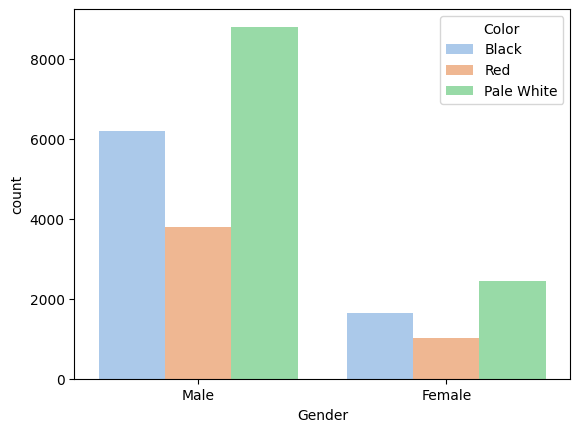

In [30]:
# is there any trend between the body style and color for the car sold in 2022 and 2023
sns.countplot(data= car_data, x='Gender', hue = 'Color' , palette = 'pastel' )
plt.show()


This visualization indicates that, regardless of gender, pale white remains the preferred color among consumers. This trend highlights a strong and uniform preference for pale white cars over other colors.

## Observations and recommendations
   ### Observations 

* The data indicates that more men bought the car than women in 2022 and 2023.

* The top-selling Models are The Diamante, JETTA, Silhouette, RL, Passant, Ram Pickup, and LSA suggesting the growing popularity for the years 2022 and 2023

* In 2023, the Montero Sport and A6 models disappeared from the top 10 models list in 2022 and were replaced by the LHS and 528i models

* SL, Cirrus, V70, CLK Coupe are absent from the last 10 car models sold in 2022 indicating possible improvement in sales or the discontinuation

* Pale white is the dominant color preference among consumers, regardless of body style or gender, for both 2022 and 2023.

* There are also seasonal patterns, with high sales in September, a dip in October and another peak in November and December. The high sales in September could be attributed to end-of-summer promotions, new model releases, or back-to-school season, which often prompts families to purchase new vehicles. The decline in October sales might be due to a lull between the end of summer and the start of the holiday season, where consumers may be holding off on major purchases.The increase in sales during November and December can be linked to holiday promotions, year-end discounts, and consumers looking to take advantage of deals before the new year.


* Each manufacturer has experienced a slight increase in sales from 2022 to 2023 reflecting maybe an improved economic condition and successful marking strategies.

   ### Recommendations
* Prioritize and promote the top 10 car models as they have been consistent all over the years 2022 and 2023 

* To capitalize on their increase in popularity, manufacturers can highlight the features and benefits of the Silhouette, Prizm, and Diamante in marketing campaigns. 

* For the new car models entering the top 10 car models in 2023, we can recommend that manufacturers keep an eye on their performance to understand their appeal and potential for sustained success.

* Also focus on year-end sales events in November and December to maximize the sales volumes during these months.

